In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Data Overview
df.shape (rows, columns) and tolists show 10 column names

In [2]:
path = "/Users/admin/Desktop/ML_Project_Churn/data/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(path)

df.shape
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Quick overview of dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Statistical Overview

In [4]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Converting TotalCharges to numeric and making invalid entries Nan

In [5]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].isna().sum()

11

Handling missing TotalCharges values only when they correspond to new customers (tenure=0) and filling them with 0 instead of dropping

In [6]:
if (df.loc[df["TotalCharges"].isna(), "tenure"] == 0).all():
    df["TotalCharges"] = df["TotalCharges"].fillna(0)

Verifying the cleaning

In [7]:
print(df[["tenure","MonthlyCharges","TotalCharges"]].describe())
print(df[["tenure", "MonthlyCharges", "TotalCharges"]].isna().sum())

            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2279.734304
std      24.559481       30.090047   2266.794470
min       0.000000       18.250000      0.000000
25%       9.000000       35.500000    398.550000
50%      29.000000       70.350000   1394.550000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000
tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64


Identifying potential class imbalance for modeling to handle imbalance and prevent model bias toward majority class

In [8]:
df["Churn"].value_counts()
df["Churn"].value_counts(normalize=True).round(3)

Churn
No     0.735
Yes    0.265
Name: proportion, dtype: float64

Separating numerical and categorical columns for preprocessing and excluding target variable and customer id from feature sets for preparation

In [9]:
target = "Churn"
id_col = "customerID"

num_cols = df.select_dtypes(include=["int64","float64"]).columns.drop([target], errors="ignore")
cat_cols = df.select_dtypes(include=["object"]).columns.drop([target, id_col], errors="ignore")

num_cols, cat_cols

(Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object'),
 Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
        'PaperlessBilling', 'PaymentMethod'],
       dtype='object'))

Visualizing the distributions of numerical features, checking for skewness, outliers, or unusual patterns that might require transformation before modeling.

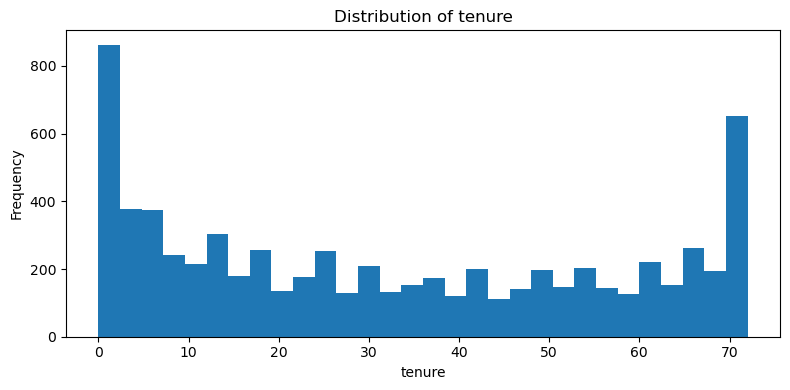

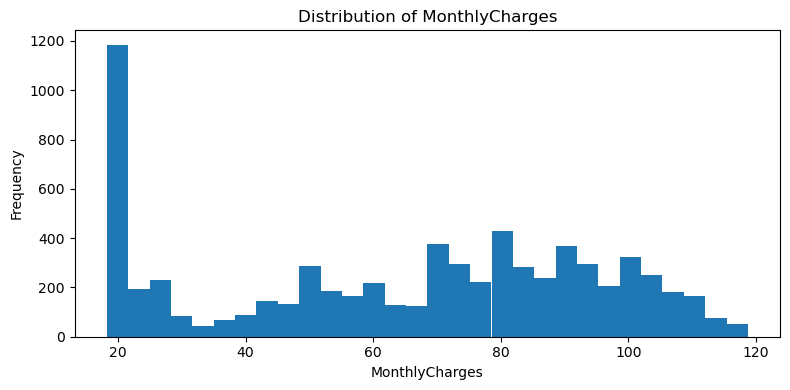

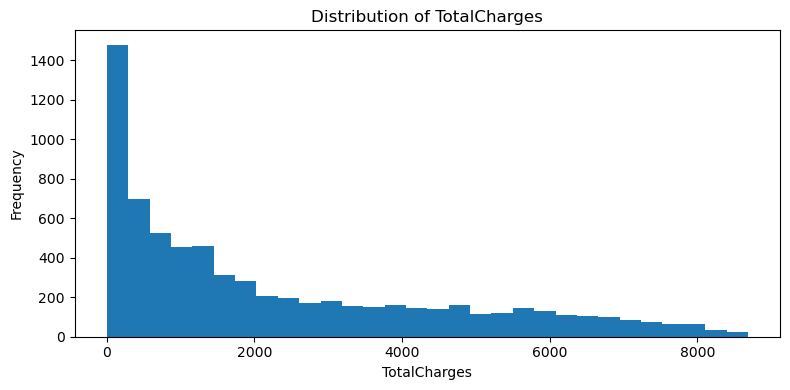

In [10]:
cols_to_plot = ["tenure", "MonthlyCharges", "TotalCharges"]
for col in cols_to_plot:
    plt.figure(figsize=(8,4))
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

Measuring asymmetry in numerical feature distributions, identifying which columns may need power transformations to normalize data for better model performance

In [11]:
skewness = df[cols_to_plot].skew().sort_values(ascending=False)
skewness

TotalCharges      0.963235
tenure            0.239540
MonthlyCharges   -0.220524
dtype: float64

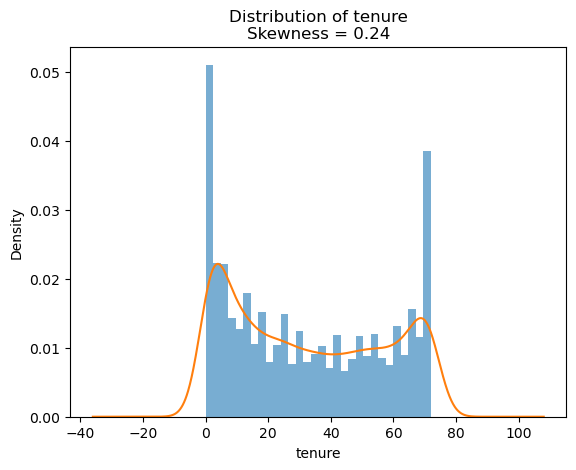

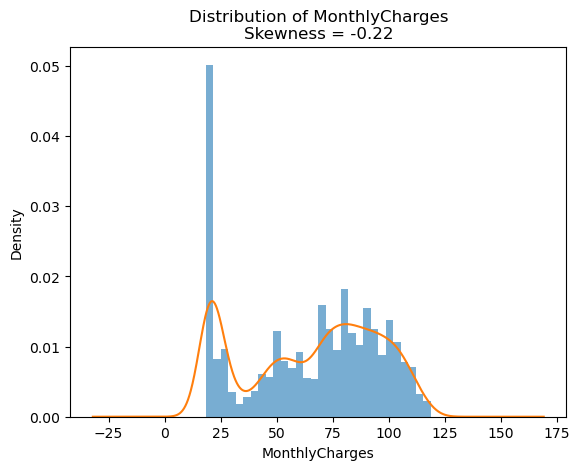

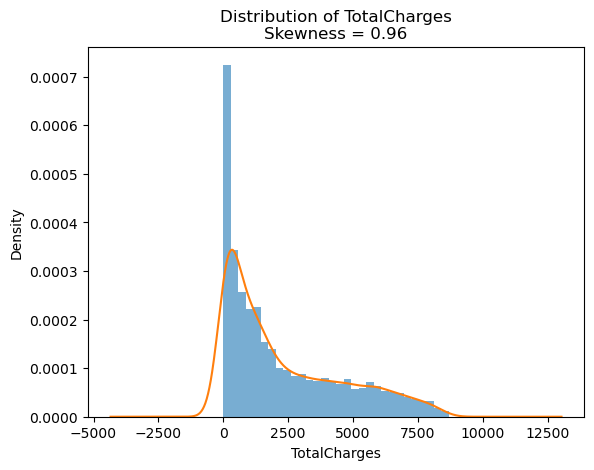

In [12]:
for col in cols_to_plot:
    plt.figure()
    
    plt.hist(df[col].dropna(), bins=30, density=True, alpha=0.6)
    
    df[col].dropna().plot(kind="kde")
    
    plt.title(f"Distribution of {col}\nSkewness = {df[col].skew():.2f}")
    plt.xlabel(col)
    plt.ylabel("Density")
    
    plt.show()

Detecting outliers in numerical columns viawith boxplots to decide whether to cap, transform, or keep extreme values that could impact model accuracy

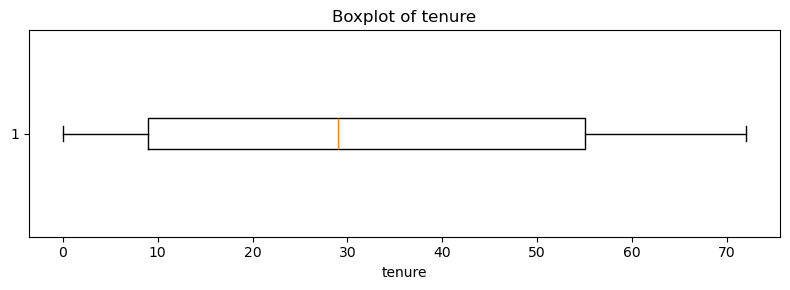

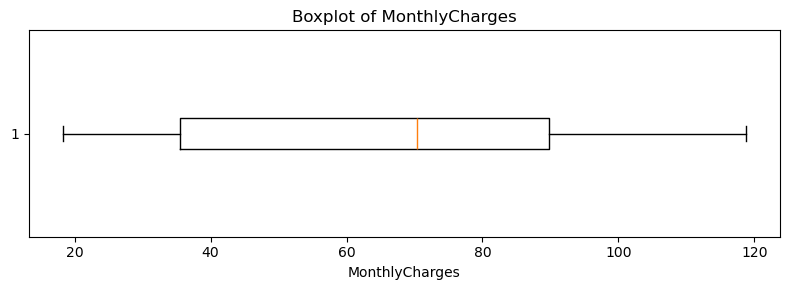

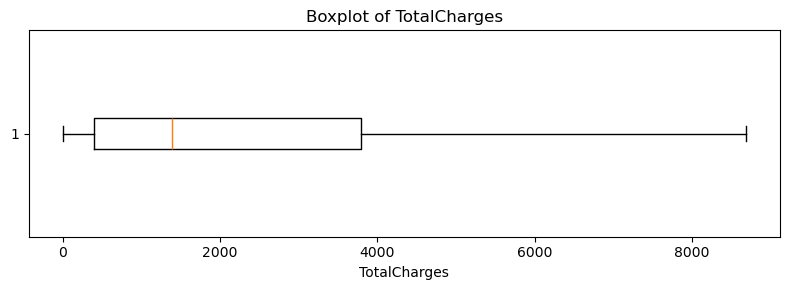

In [13]:
for col in cols_to_plot:
    plt.figure(figsize=(8,3))
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

Systematically assessing categorical feature complexity by counting unique values to identify which columns need simpler encoding (one-hot) versus advanced handling (target/hashing) for modeling.

In [14]:
cardinality = pd.DataFrame({
    "feature": cat_cols,
    "unique_values": [df[c].nunique() for c in cat_cols]
}).sort_values(by="unique_values", ascending=False)

cardinality

,feature,unique_values
14,PaymentMethod,4
4,MultipleLines,3
5,InternetService,3
6,OnlineSecurity,3
7,OnlineBackup,3
8,DeviceProtection,3
9,TechSupport,3
10,StreamingTV,3
11,StreamingMovies,3
12,Contract,3


Checking value distributions of all categorical features, checking for data quality issues, rare categories, or imbalanced classes that need merging or special preprocessing.

In [15]:
for col in cat_cols:
    print(f"\n{col}")
    print(df[col].value_counts())


gender
gender
Male      3555
Female    3488
Name: count, dtype: int64

Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

PhoneService
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

MultipleLines
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

InternetService
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

OnlineSecurity
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

OnlineBackup
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

DeviceProtection
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

TechSupport
TechSupport
No             

Isolating exactly which categorical columns are binary for efficient encoding

In [16]:
binary_cats = [c for c in cat_cols if df[c].nunique() == 2]
binary_cats

['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

Visualizing how customer tenure differs between churners vs non-churners

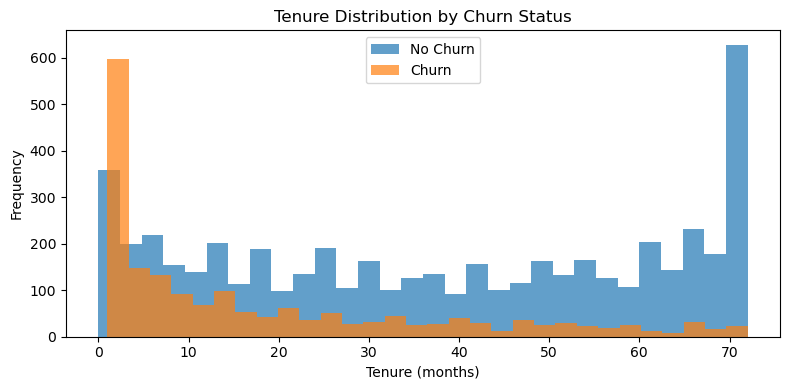

In [17]:
df["Churn_flag"] = df["Churn"].map({"No": 0, "Yes": 1})

plt.figure(figsize=(8,4))
plt.hist(df[df["Churn"]=="No"]["tenure"], bins=30, alpha=0.7, label="No Churn")
plt.hist(df[df["Churn"]=="Yes"]["tenure"], bins=30, alpha=0.7, label="Churn")
plt.legend()
plt.title("Tenure Distribution by Churn Status")
plt.xlabel("Tenure (months)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


Comparing MonthlyCharges distributions between churners and non-churners

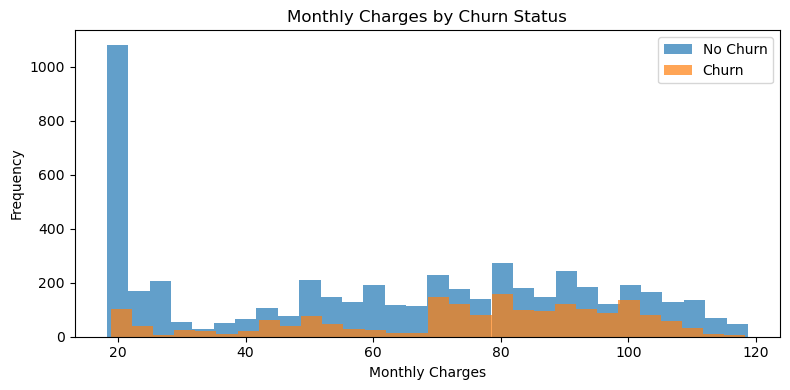

In [18]:
plt.figure(figsize=(8,4))
plt.hist(df[df["Churn"]=="No"]["MonthlyCharges"], bins=30, alpha=0.7, label="No Churn")
plt.hist(df[df["Churn"]=="Yes"]["MonthlyCharges"], bins=30, alpha=0.7, label="Churn")
plt.legend()
plt.title("Monthly Charges by Churn Status")
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Comparing TotalCharges distributions between churn groups, analyzing if lifetime customer value relates to churn probability, with dropna() handling earlier missing value conversions.

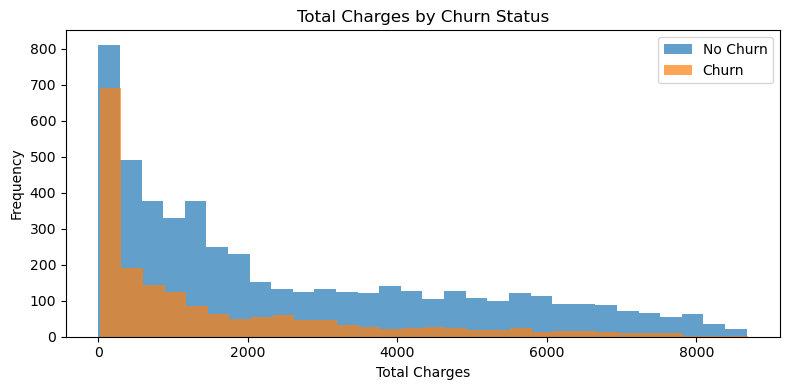

In [19]:
plt.figure(figsize=(8,4))
plt.hist(df[df["Churn"]=="No"]["TotalCharges"].dropna(), bins=30, alpha=0.7, label="No Churn")
plt.hist(df[df["Churn"]=="Yes"]["TotalCharges"].dropna(), bins=30, alpha=0.7, label="Churn")
plt.legend()
plt.title("Total Charges by Churn Status")
plt.xlabel("Total Charges")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Creating a reusable function that calculates churn percentages grouped by any feature, quickly identifying which categories have highest churn rates for feature selection insights.

In [20]:
def churn_rate_by_feature(df, feature):
    return (
        df.groupby(feature)["Churn_flag"]
        .mean()
        .sort_values(ascending=False)
    )

Analyzing how churn rates vary by contract type

In [21]:
churn_rate_by_feature(df, "Contract")

Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Churn_flag, dtype: float64

Visualizing churn rate differences across contract types with a bar chart

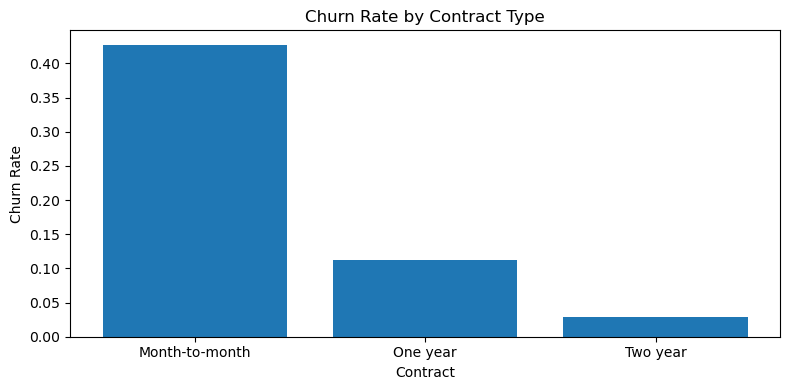

In [22]:
rates = churn_rate_by_feature(df, "Contract")

plt.figure(figsize=(8,4))
plt.bar(rates.index, rates.values)
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate")
plt.xlabel("Contract")
plt.tight_layout()
plt.show()

Visualizing which payment methods have highest churn rates

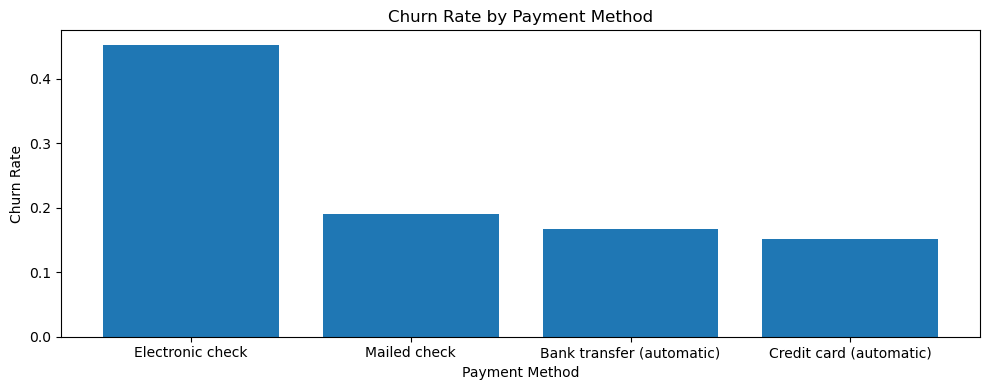

In [23]:
rates = churn_rate_by_feature(df, "PaymentMethod")

plt.figure(figsize=(10,4))
plt.bar(rates.index, rates.values)
plt.title("Churn Rate by Payment Method")
plt.ylabel("Churn Rate")
plt.xlabel("Payment Method")
plt.tight_layout()
plt.show()


Comparing churn rates across internet service types

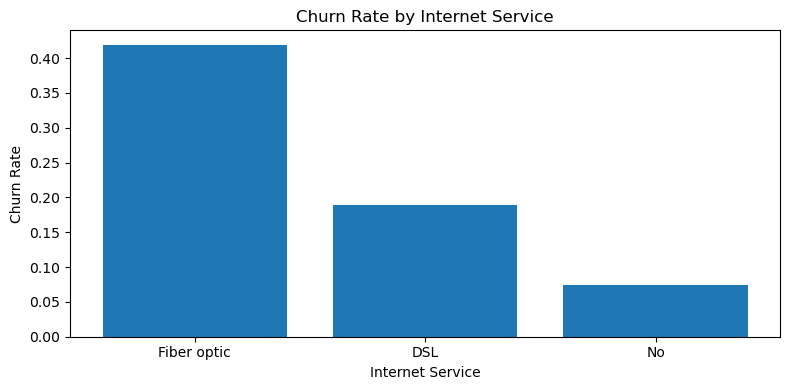

In [24]:
rates = churn_rate_by_feature(df, "InternetService")

plt.figure(figsize=(8,4))
plt.bar(rates.index, rates.values)
plt.title("Churn Rate by Internet Service")
plt.ylabel("Churn Rate")
plt.xlabel("Internet Service")
plt.tight_layout()
plt.show()


Calculate and visualize correlations between numerical features using a heatmap

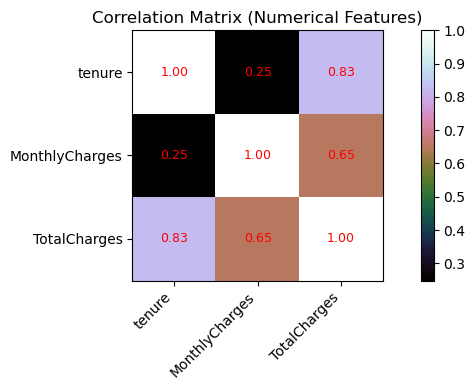

In [25]:
corr = df[cols_to_plot].corr()

plt.figure(figsize=(8,4))
plt.imshow(corr, interpolation="nearest", cmap="cubehelix")
plt.colorbar()

plt.xticks(range(len(corr)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr)), corr.columns)

for i in range(len(corr)):
    for j in range(len(corr)):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}",
                 ha="center", va="center", color="red", fontsize=9)

plt.title("Correlation Matrix (Numerical Features)")
plt.tight_layout()
plt.show()


Ranking numerical features by their correlation with churn, identifying which numerical variables have strongest linear relationship with target for feature selection.

In [26]:
churn_corr = (
    df[cols_to_plot]
    .assign(Churn=df["Churn_flag"])
    .corr()["Churn"]
    .sort_values(ascending=False)
)

churn_corr


Churn             1.000000
MonthlyCharges    0.193356
TotalCharges     -0.198324
tenure           -0.352229
Name: Churn, dtype: float64

Preparing clean data for modeling by removing IDs, handling missing values, dropping redundant columns, and creating feature matrix (X) and binary target vector (y) for ML algorithms

In [27]:
df_model = df.drop(columns=["customerID"])

df_model["TotalCharges"] = df_model["TotalCharges"].fillna(0)

df_model = df_model.drop(columns=["Churn_flag"], errors="ignore")

X = df_model.drop(columns=["Churn"])
y = df_model["Churn"].map({"No": 0, "Yes": 1})

Convert SeniorCitizen from numerical to categorical

In [28]:
X["SeniorCitizen"] = X["SeniorCitizen"].map({0: "No", 1: "Yes"})

Separating features into numeric and categorical lists for scikit-learn preprocessing pipelines

In [29]:
numeric_features = ["tenure", "MonthlyCharges", "TotalCharges"]

categorical_features = [col for col in X.columns if col not in numeric_features]

numeric_features, categorical_features


(['tenure', 'MonthlyCharges', 'TotalCharges'],
 ['gender',
  'SeniorCitizen',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod'])

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

Creating a preprocessing pipeline that standardizes numeric features and one-hot encodes categoricals, preparing all features for ML algorithms in a single reusable transformer.

In [31]:
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

Split data into train/test sets with 80/20 ratio, maintaining same class distribution in both sets (stratify=y) for reliable model evaluation, and ensuring reproducibility (random_state=42)

X, y: Features and target

test_size=0.2: 20% test, 80% train

random_state=42: Same random split every run

stratify=y: Preserves churn ratio (73.5/26.5) in both train and test sets

stratify: Prevents skewed class distribution in splits that could bias model evaluation, especially important with imbalanced data

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold,GridSearchCV


Combining preprocessing and logistic regression into one pipeline, with balanced class weights to handle churn imbalance and increased iterations for convergence

In [34]:
lr_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(
        max_iter=1000,
        class_weight="balanced",
        random_state=42
    ))
])

Defining hyperparameter grid for logistic regression tuning

In [35]:
param_grid_lr = {
    "model__C": [0.01, 0.1, 1, 10],
    "model__penalty": ["l1", "l2"],
    "model__solver": ["liblinear"]
}

Creating 5-fold cross-validation that maintains class balance in each fold (stratified) with shuffling for better distribution

In [36]:
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

Performing exhaustive hyperparameter search using F1 score (appropriate for imbalanced churn data), parallel processing (n_jobs=-1), with detailed logging (verbose=1)

In [37]:
grid_search_lr = GridSearchCV(
    estimator=lr_pipeline,
    param_grid=param_grid_lr,
    scoring="f1",
    cv=cv,
    n_jobs=-1,
    verbose=1
)

Executing the grid search, training and evaluating all parameter combinations on training data

In [38]:
grid_search_lr.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['gender',
                                                                          'SeniorC...
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'StreamingTV',
                                                                          'StreamingMovies',
                                                                          'Contract',
                                                                          'PaperlessBilling',
                                                                          'PaymentMethod'])])),
                                       ('model',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=1000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'model__C': [0.01, 0.1, 1, 10],
                         'model__penalty': ['l1', 'l2'],
                         'model__solver': ['liblinear']},
             scoring='f1', verbose=1)

Extracting the optimal pipeline with tuned hyperparameters from the grid search results

In [39]:
best_lr = grid_search_lr.best_estimator_

Evaluating the tuned logistic regression model on test data using accuracy, F1 score, and confusion matrix

In [40]:
y_pred_lr = best_lr.predict(X_test)

lr_acc = accuracy_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)
lr_cm = confusion_matrix(y_test, y_pred_lr)

lr_acc, lr_f1, lr_cm

(0.7444996451383961,
 0.620253164556962,
 array([[755, 280],
        [ 80, 294]]))

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

Creating a random forest pipeline with balanced class weights and parallel processing

In [42]:
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(
        random_state=42,
        n_jobs=-1,
        class_weight="balanced"
    ))
])

Defining random forest hyperparameter grid covering tree count, depth limits, and split/leaf constraints 

In [43]:
param_grid = {
    "model__n_estimators": [200, 400],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5],
    "model__min_samples_leaf": [1, 2]
}

Reusing the same stratified 5-fold cross-validation scheme from earlier

In [44]:
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

Performing hyperparameter tuning for random forest using F1 score optimization with parallel processing

In [45]:
grid_search_rf = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid,
    scoring="f1",
    cv=cv,
    n_jobs=-1,
    verbose=1
)

Train and evaluate all random forest parameter combinations via cross-validation

In [46]:
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['gender',
                                                                          'SeniorC...
                                                                          'TechSupport',
                                                                          'StreamingTV',
                                                                          'StreamingMovies',
                                                                          'Contract',
                                                                          'PaperlessBilling',
                                                                          'PaymentMethod'])])),
                                       ('model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               n_jobs=-1,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 10, 20],
                         'model__min_samples_leaf': [1, 2],
                         'model__min_samples_split': [2, 5],
                         'model__n_estimators': [200, 400]},
             scoring='f1', verbose=1)

Examine the optimal hyperparameter values selected by grid search for random forest

In [47]:
grid_search_rf.best_params_

{'model__max_depth': 10,
 'model__min_samples_leaf': 2,
 'model__min_samples_split': 5,
 'model__n_estimators': 200}

Evaluating the best random forest model, make test predictions, and calculate accuracy, F1 score, and confusion matrix

In [48]:
best_rf = grid_search_rf.best_estimator_

y_pred_rf = best_rf.predict(X_test)

rf_acc = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_cm = confusion_matrix(y_test, y_pred_rf)

rf_acc, rf_f1, rf_cm

(0.7665010645848119,
 0.631578947368421,
 array([[798, 237],
        [ 92, 282]]))

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

Creating gradient boosting pipeline

In [50]:
gb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", GradientBoostingClassifier(random_state=42))
])

Gradient boosting hyperparameter grid controlling boosting iterations, learning rate, tree depth, and sample fraction for tuning performance and preventing overfitting.

In [51]:
param_grid_gb = {
    "model__n_estimators": [100, 200],
    "model__learning_rate": [0.05, 0.1],
    "model__max_depth": [3, 5],
    "model__subsample": [0.8, 1.0]
}

Performing hyperparameter tuning for gradient boosting with the same F1 scoring and cross-validation strategy

In [52]:
grid_search_gb = GridSearchCV(
    estimator=gb_pipeline,
    param_grid=param_grid_gb,
    scoring="f1",
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid_search_gb.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['gender',
                                                                          'SeniorC...
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'StreamingTV',
                                                                          'StreamingMovies',
                                                                          'Contract',
                                                                          'PaperlessBilling',
                                                                          'PaymentMethod'])])),
                                       ('model',
                                        GradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.05, 0.1],
                         'model__max_depth': [3, 5],
                         'model__n_estimators': [100, 200],
                         'model__subsample': [0.8, 1.0]},
             scoring='f1', verbose=1)

Evaluate the optimized gradient boosting model on test data using same metrics as previous models

In [53]:
best_gb = grid_search_gb.best_estimator_

y_pred_gb = best_gb.predict(X_test)

gb_acc = accuracy_score(y_test, y_pred_gb)
gb_f1 = f1_score(y_test, y_pred_gb)
gb_cm = confusion_matrix(y_test, y_pred_gb)

gb_acc, gb_f1, gb_cm

(0.7998580553584103,
 0.5765765765765766,
 array([[935, 100],
        [182, 192]]))

In [54]:
from sklearn.ensemble import VotingClassifier

Creating an ensemble that combines predictions from all three tuned models using soft voting

In [55]:
ensemble = VotingClassifier(
    estimators=[
        ("lr", best_lr),
        ("rf", best_rf),
        ("gb", best_gb)
    ],
    voting="soft",
    n_jobs=-1
)

Train the voting classifier ensemble on the training data, allowing it to learn optimal weighting of the three base models' predictions for churn classification.

In [56]:
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              Pipeline(steps=[('preprocessor',
                                               ColumnTransformer(transformers=[('num',
                                                                                Pipeline(steps=[('scaler',
                                                                                                 StandardScaler())]),
                                                                                ['tenure',
                                                                                 'MonthlyCharges',
                                                                                 'TotalCharges']),
                                                                               ('cat',
                                                                                Pipeline(steps=[('onehot',
                                                                                                 OneHotEncoder(drop='first',
                                                                                                               handle_unknown='ignore'))]),
                                                                                ['gender',
                                                                                 'SeniorCitizen',
                                                                                 'Partner',
                                                                                 'Dependents',
                                                                                 'PhoneService',
                                                                                 'M...
                                                                                 'Partner',
                                                                                 'Dependents',
                                                                                 'PhoneService',
                                                                                 'MultipleLines',
                                                                                 'InternetService',
                                                                                 'OnlineSecurity',
                                                                                 'OnlineBackup',
                                                                                 'DeviceProtection',
                                                                                 'TechSupport',
                                                                                 'StreamingTV',
                                                                                 'StreamingMovies',
                                                                                 'Contract',
                                                                                 'PaperlessBilling',
                                                                                 'PaymentMethod'])])),
                                              ('model',
                                               GradientBoostingClassifier(learning_rate=0.05,
                                                                          n_estimators=200,
                                                                          random_state=42,
                                                                          subsample=0.8))]))],
                 n_jobs=-1, voting='soft')

Evaluate the ensemble model performance on test data and compare against individual models

In [57]:
y_pred_ens = ensemble.predict(X_test)

ens_acc = accuracy_score(y_test, y_pred_ens)
ens_f1 = f1_score(y_test, y_pred_ens)
ens_cm = confusion_matrix(y_test, y_pred_ens)

ens_acc, ens_f1, ens_cm

(0.7750177430801988,
 0.6212664277180406,
 array([[832, 203],
        [114, 260]]))

In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, f1_score

models_to_compare = {
    "Logistic Regression": best_lr,
    "Random Forest (tuned)": best_rf,
    "Gradient Boosting (tuned)": best_gb,
    "Ensemble (soft vote)": ensemble
}

Visually compare all models side-by-side using confusion matrices with accuracy and F1 scores

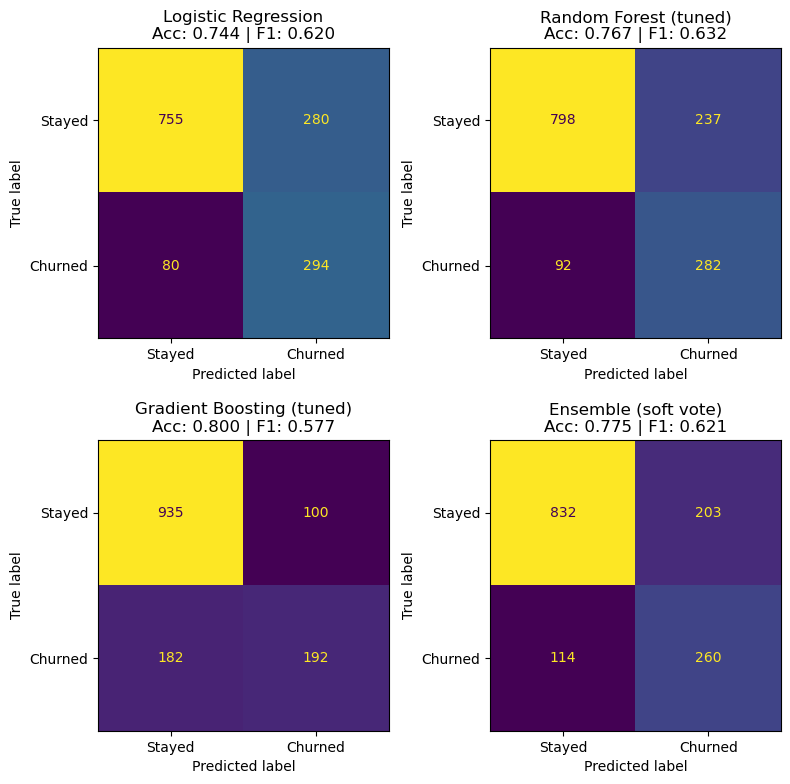

In [59]:
n_models = len(models_to_compare)
cols = 2
rows = (n_models + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(8, 4 * rows))
axes = axes.flatten()

for i, (name, model) in enumerate(models_to_compare.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Stayed", "Churned"])
    disp.plot(ax=axes[i], colorbar=False)

    axes[i].set_title(f"{name}\nAcc: {acc:.3f} | F1: {f1:.3f}")

for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

Making train/test split (stratified)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Transform features into numbers

In [61]:
X_train_nn = preprocessor.fit_transform(X_train)
X_test_nn  = preprocessor.transform(X_test)

Converting to dense arrays

In [62]:
if hasattr(X_train_nn, "toarray"):
    X_train_nn = X_train_nn.toarray()
    X_test_nn  = X_test_nn.toarray()

X_train_nn = X_train_nn.astype(np.float32)
X_test_nn  = X_test_nn.astype(np.float32)

y_train_nn = np.array(y_train).astype(np.float32)
y_test_nn  = np.array(y_test).astype(np.float32)

X_train_nn.shape, X_test_nn.shape

((5634, 30), (1409, 30))

In [63]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,regularizers

Building FFNN

In [64]:
model = keras.Sequential([
    layers.Input(shape=(X_train_nn.shape[1],)),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,049 (8.00 KB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 0 (0.00 B)

Train

In [65]:
history = model.fit(
    X_train_nn, y_train_nn,
    validation_split=0.2,
    epochs=30,
    batch_size=64,
    verbose=1
)

Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7420 - loss: 0.5042 - val_accuracy: 0.7924 - val_loss: 0.4494
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.8014 - loss: 0.4273 - val_accuracy: 0.7906 - val_loss: 0.4431
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - accuracy: 0.8025 - loss: 0.4190 - val_accuracy: 0.7950 - val_loss: 0.4365
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.8043 - loss: 0.4143 - val_accuracy: 0.7941 - val_loss: 0.4346
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.8050 - loss: 0.4115 - val_accuracy: 0.7870 - val_loss: 0.4374
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - accuracy: 0.8067 - loss: 0.4090 - val_accuracy: 0.7968 - val_loss: 0.4332
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - accuracy: 0.8083 - loss: 0.4078 - val_accuracy: 0.7870 - val_loss: 0.4355
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.8076 - loss: 0.4063 - val_accuracy: 0.79

Plot training curves (loss + accuracy)

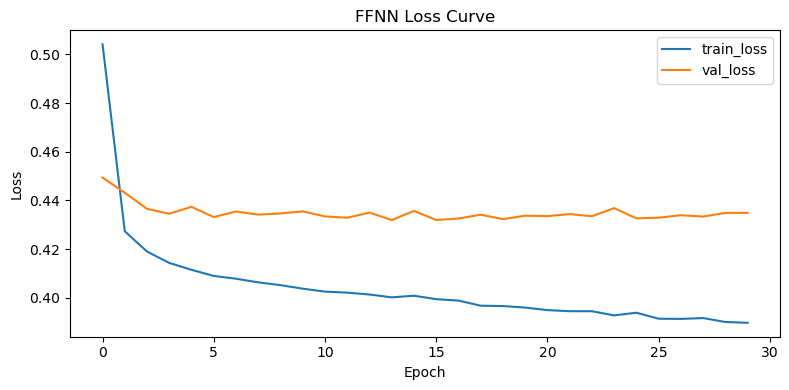

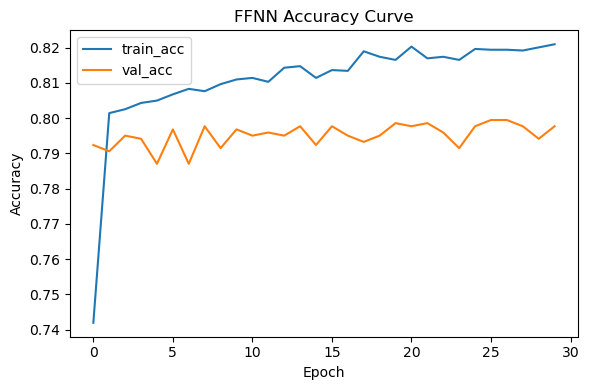

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("FFNN Loss Curve")
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.legend(); plt.tight_layout(); plt.show()

plt.figure(figsize=(6,4))
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.title("FFNN Accuracy Curve")
plt.xlabel("Epoch"); plt.ylabel("Accuracy")
plt.legend(); plt.tight_layout(); plt.show()

Evaluate

In [67]:
y_prob = model.predict(X_test_nn).ravel()
y_pred = (y_prob >= 0.5).astype(int)

acc = accuracy_score(y_test_nn, y_pred)
f1 = f1_score(y_test_nn, y_pred)
cm = confusion_matrix(y_test_nn, y_pred)

acc, f1, cm

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


(0.7984386089425124,
 0.5823529411764706,
 array([[927, 108],
        [176, 198]]))

Early stopping

In [68]:
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train_nn, y_train_nn,
    validation_split=0.2,
    epochs=200,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8207 - loss: 0.3885 - val_accuracy: 0.7915 - val_loss: 0.4350
Epoch 2/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - accuracy: 0.8203 - loss: 0.3879 - val_accuracy: 0.7933 - val_loss: 0.4384
Epoch 3/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - accuracy: 0.8221 - loss: 0.3885 - val_accuracy: 0.7941 - val_loss: 0.4362
Epoch 4/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 0.8198 - loss: 0.3876 - val_accuracy: 0.7933 - val_loss: 0.4351
Epoch 5/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - accuracy: 0.8198 - loss: 0.3866 - val_accuracy: 0.7915 - val_loss: 0.4359
Epoch 6/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.8192 - loss: 0.3854 - val_accuracy: 0.7950 - val_loss: 0.4379
Epoch 7/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.8223 - loss: 0.3857 - val_accuracy: 0.7941 - val_loss: 0.4358
Epoch 8/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.8234 - loss: 0.3849 - val_accura

In [69]:
y_prob = model.predict(X_test_nn).ravel()
y_pred = (y_prob >= 0.5).astype(int)

acc = accuracy_score(y_test_nn, y_pred)
f1 = f1_score(y_test_nn, y_pred)
cm = confusion_matrix(y_test_nn, y_pred)

acc, f1, cm

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step


(0.7913413768630234,
 0.5823863636363636,
 array([[910, 125],
        [169, 205]]))

Class weights

In [70]:
from sklearn.utils.class_weight import compute_class_weight

classes = np.array([0, 1])
weights = compute_class_weight(
    class_weight="balanced",
    classes=classes,
    y=y_train_nn.astype(int)
)

class_weights = {0: weights[0], 1: weights[1]}
class_weights

{0: 0.6805991785455424, 1: 1.8842809364548494}

Same model

In [71]:
model = keras.Sequential([
    layers.Input(shape=(X_train_nn.shape[1],)),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [72]:
history = model.fit(
    X_train_nn, y_train_nn,
    validation_split=0.2,
    epochs=200,
    batch_size=64,
    callbacks=[early_stop],
    class_weight=class_weights,
    verbose=1
)

Epoch 1/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7486 - loss: 0.5730 - val_accuracy: 0.7107 - val_loss: 0.5294
Epoch 2/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7460 - loss: 0.4926 - val_accuracy: 0.7258 - val_loss: 0.5234
Epoch 3/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - accuracy: 0.7586 - loss: 0.4834 - val_accuracy: 0.7205 - val_loss: 0.5374
Epoch 4/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 0.7615 - loss: 0.4792 - val_accuracy: 0.7152 - val_loss: 0.5400
Epoch 5/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - accuracy: 0.7588 - loss: 0.4765 - val_accuracy: 0.7187 - val_loss: 0.5280
Epoch 6/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - accuracy: 0.7582 - loss: 0.4731 - val_accuracy: 0.7276 - val_loss: 0.5038
Epoch 7/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.7613 - loss: 0.4715 - val_accuracy: 0.7125 - val_loss: 0.5353
Epoch 8/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.7621 - loss: 0.4707 - val_accuracy

In [73]:
y_prob = model.predict(X_test_nn).ravel()
y_pred = (y_prob >= 0.5).astype(int)

acc = accuracy_score(y_test_nn, y_pred)
f1 = f1_score(y_test_nn, y_pred)
cm = confusion_matrix(y_test_nn, y_pred)

acc, f1, cm

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step


(0.7246273953158269,
 0.6064908722109533,
 array([[722, 313],
        [ 75, 299]]))

Dropout

In [74]:
model = keras.Sequential([
    layers.Input(shape=(X_train_nn.shape[1],)),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


Training with early stopping + class weights

In [75]:
history = model.fit(
    X_train_nn, y_train_nn,
    validation_split=0.2,
    epochs=200,
    batch_size=64,
    callbacks=[early_stop],
    class_weight=class_weights,
    verbose=1
)

Epoch 1/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7005 - loss: 0.5717 - val_accuracy: 0.7285 - val_loss: 0.5485
Epoch 2/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7455 - loss: 0.5114 - val_accuracy: 0.7258 - val_loss: 0.5358
Epoch 3/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7513 - loss: 0.5028 - val_accuracy: 0.7258 - val_loss: 0.5119
Epoch 4/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7495 - loss: 0.5004 - val_accuracy: 0.7205 - val_loss: 0.5205
Epoch 5/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7482 - loss: 0.4933 - val_accuracy: 0.7258 - val_loss: 0.5000
Epoch 6/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7497 - loss: 0.4906 - val_accuracy: 0.7178 - val_loss: 0.5138
Epoch 7/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7542 - loss: 0.4890 - val_accuracy: 0.7134 - val_loss: 0.5245
Epoch 8/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7524 - loss: 0.4903 - val_accuracy: 0.7178 - v

In [76]:
y_prob = model.predict(X_test_nn).ravel()
y_pred = (y_prob >= 0.5).astype(int)

acc = accuracy_score(y_test_nn, y_pred)
f1 = f1_score(y_test_nn, y_pred)
cm = confusion_matrix(y_test_nn, y_pred)

acc, f1, cm

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step


(0.7203690560681334,
 0.6044176706827309,
 array([[714, 321],
        [ 73, 301]]))

Batch Normalization (BatchNorm+Dropout)

In [77]:
model = keras.Sequential([
    layers.Input(shape=(X_train_nn.shape[1],)),
    layers.Dense(64, use_bias=False),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(0.3),

    layers.Dense(32, use_bias=False),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(0.3),

    layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


Training with early stopping and class weights

In [78]:
history = model.fit(
    X_train_nn, y_train_nn,
    validation_split=0.2,
    epochs=200,
    batch_size=64,
    callbacks=[early_stop],
    class_weight=class_weights,
    verbose=1
)

Epoch 1/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5394 - loss: 0.6736 - val_accuracy: 0.6948 - val_loss: 0.5763
Epoch 2/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6971 - loss: 0.5582 - val_accuracy: 0.7063 - val_loss: 0.5607
Epoch 3/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7315 - loss: 0.5313 - val_accuracy: 0.7116 - val_loss: 0.5508
Epoch 4/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7355 - loss: 0.5233 - val_accuracy: 0.7187 - val_loss: 0.5295
Epoch 5/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7408 - loss: 0.5108 - val_accuracy: 0.7178 - val_loss: 0.5210
Epoch 6/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7426 - loss: 0.5024 - val_accuracy: 0.7161 - val_loss: 0.5203
Epoch 7/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7460 - loss: 0.5034 - val_accuracy: 0.7134 - val_loss: 0.5298
Epoch 8/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7491 - loss: 0.4964 - val_accuracy: 0.7134 - v

In [79]:
y_prob = model.predict(X_test_nn).ravel()
y_pred = (y_prob >= 0.5).astype(int)

acc = accuracy_score(y_test_nn, y_pred)
f1 = f1_score(y_test_nn, y_pred)
cm = confusion_matrix(y_test_nn, y_pred)

acc, f1, cm

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


(0.7295954577714692,
 0.6216484607745779,
 array([[715, 320],
        [ 61, 313]]))

Controlled experiments

Exp 1 - Optimizer: Adam vs RMSprop

In [80]:
model = keras.Sequential([
    layers.Input(shape=(X_train_nn.shape[1],)),

    layers.Dense(64, use_bias=False),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(0.3),

    layers.Dense(32, use_bias=False),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(0.3),

    layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [81]:
history = model.fit(
    X_train_nn, y_train_nn,
    validation_split=0.2,
    epochs=200,
    batch_size=64,
    callbacks=[early_stop],
    class_weight=class_weights,
    verbose=1
)

Epoch 1/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6281 - loss: 0.6016 - val_accuracy: 0.7578 - val_loss: 0.5339
Epoch 2/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7171 - loss: 0.5384 - val_accuracy: 0.7347 - val_loss: 0.5198
Epoch 3/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7266 - loss: 0.5271 - val_accuracy: 0.7178 - val_loss: 0.5219
Epoch 4/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7331 - loss: 0.5161 - val_accuracy: 0.7223 - val_loss: 0.5246
Epoch 5/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7329 - loss: 0.5128 - val_accuracy: 0.7240 - val_loss: 0.5121
Epoch 6/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7428 - loss: 0.5125 - val_accuracy: 0.7214 - val_loss: 0.5185
Epoch 7/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7411 - loss: 0.4999 - val_accuracy: 0.7187 - val_loss: 0.5257
Epoch 8/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7515 - loss: 0.4890 - val_accuracy: 0.7205 - v

In [82]:
y_prob = model.predict(X_test_nn).ravel()
y_pred = (y_prob >= 0.5).astype(int)

acc = accuracy_score(y_test_nn, y_pred)
f1 = f1_score(y_test_nn, y_pred)
cm = confusion_matrix(y_test_nn, y_pred)

acc, f1, cm

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


(0.758694109297374,
 0.6136363636363636,
 array([[799, 236],
        [104, 270]]))

Exp 2 - Learning Rate

In [83]:
model = keras.Sequential([
    layers.Input(shape=(X_train_nn.shape[1],)),

    layers.Dense(64, use_bias=False),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(0.3),

    layers.Dense(32, use_bias=False),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(0.3),

    layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=3e-4),  # smaller LR
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


In [84]:
history = model.fit(
    X_train_nn, y_train_nn,
    validation_split=0.2,
    epochs=200,
    batch_size=64,
    callbacks=[early_stop],
    class_weight=class_weights,
    verbose=1
)

Epoch 1/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5134 - loss: 0.7508 - val_accuracy: 0.6735 - val_loss: 0.6174
Epoch 2/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6417 - loss: 0.6099 - val_accuracy: 0.7214 - val_loss: 0.5533
Epoch 3/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6734 - loss: 0.5818 - val_accuracy: 0.7196 - val_loss: 0.5371
Epoch 4/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7127 - loss: 0.5434 - val_accuracy: 0.7134 - val_loss: 0.5377
Epoch 5/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7144 - loss: 0.5475 - val_accuracy: 0.7116 - val_loss: 0.5432
Epoch 6/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7300 - loss: 0.5298 - val_accuracy: 0.7081 - val_loss: 0.5443
Epoch 7/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7406 - loss: 0.5193 - val_accuracy: 0.7063 - val_loss: 0.5446
Epoch 8/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7351 - loss: 0.5173 - val_accuracy: 0.7081 - v

In [85]:
y_prob = model.predict(X_test_nn).ravel()
y_pred = (y_prob >= 0.5).astype(int)

acc = accuracy_score(y_test_nn, y_pred)
f1 = f1_score(y_test_nn, y_pred)
cm = confusion_matrix(y_test_nn, y_pred)

acc, f1, cm

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


(0.6919801277501775,
 0.5616161616161616,
 array([[697, 338],
        [ 96, 278]]))

Exp 3 - Activation Function (ReLU - ELU)

In [86]:
model = keras.Sequential([
    layers.Input(shape=(X_train_nn.shape[1],)),

    layers.Dense(64, use_bias=False),
    layers.BatchNormalization(),
    layers.Activation("elu"),
    layers.Dropout(0.3),

    layers.Dense(32, use_bias=False),
    layers.BatchNormalization(),
    layers.Activation("elu"),
    layers.Dropout(0.3),

    layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


In [87]:
history = model.fit(
    X_train_nn, y_train_nn,
    validation_split=0.2,
    epochs=200,
    batch_size=64,
    callbacks=[early_stop],
    class_weight=class_weights,
    verbose=1
)

Epoch 1/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6816 - loss: 0.5718 - val_accuracy: 0.7196 - val_loss: 0.5560
Epoch 2/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7322 - loss: 0.5252 - val_accuracy: 0.7294 - val_loss: 0.5263
Epoch 3/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7364 - loss: 0.5145 - val_accuracy: 0.7223 - val_loss: 0.5263
Epoch 4/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7433 - loss: 0.5095 - val_accuracy: 0.7294 - val_loss: 0.5179
Epoch 5/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7451 - loss: 0.5033 - val_accuracy: 0.7232 - val_loss: 0.5265
Epoch 6/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7428 - loss: 0.5044 - val_accuracy: 0.7187 - val_loss: 0.5281
Epoch 7/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7495 - loss: 0.4988 - val_accuracy: 0.7232 - val_loss: 0.5278
Epoch 8/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7488 - loss: 0.4986 - val_accuracy: 0.7178 - v

In [88]:
y_prob = model.predict(X_test_nn).ravel()
y_pred = (y_prob >= 0.5).astype(int)

acc = accuracy_score(y_test_nn, y_pred)
f1 = f1_score(y_test_nn, y_pred)
cm = confusion_matrix(y_test_nn, y_pred)

acc, f1, cm

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


(0.7196593328601846,
 0.6014127144298688,
 array([[716, 319],
        [ 76, 298]]))

L2 regularization

In [89]:
model = keras.Sequential([
    layers.Input(shape=(X_train_nn.shape[1],)),

    layers.Dense(
        64,
        use_bias=False,
        kernel_regularizer=regularizers.l2(1e-4)
    ),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(0.3),

    layers.Dense(
        32,
        use_bias=False,
        kernel_regularizer=regularizers.l2(1e-4)
    ),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(0.3),

    layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [90]:
history = model.fit(
    X_train_nn, y_train_nn,
    validation_split=0.2,
    epochs=200,
    batch_size=64,
    callbacks=[early_stop],
    class_weight=class_weights,
    verbose=1
)

Epoch 1/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6732 - loss: 0.6117 - val_accuracy: 0.6948 - val_loss: 0.5810
Epoch 2/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7215 - loss: 0.5442 - val_accuracy: 0.6921 - val_loss: 0.5685
Epoch 3/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7306 - loss: 0.5351 - val_accuracy: 0.6948 - val_loss: 0.5655
Epoch 4/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7355 - loss: 0.5187 - val_accuracy: 0.7072 - val_loss: 0.5555
Epoch 5/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7373 - loss: 0.5086 - val_accuracy: 0.7081 - val_loss: 0.5536
Epoch 6/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7318 - loss: 0.5209 - val_accuracy: 0.7054 - val_loss: 0.5496
Epoch 7/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7471 - loss: 0.5113 - val_accuracy: 0.7028 - val_loss: 0.5470
Epoch 8/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7433 - loss: 0.5120 - val_accuracy: 0.7054 - v

In [91]:
y_prob = model.predict(X_test_nn).ravel()
y_pred = (y_prob >= 0.5).astype(int)

acc = accuracy_score(y_test_nn, y_pred)
f1 = f1_score(y_test_nn, y_pred)
cm = confusion_matrix(y_test_nn, y_pred)

acc, f1, cm

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


(0.6990773598296665,
 0.5883495145631068,
 array([[682, 353],
        [ 71, 303]]))

Building Autoencoder

In [92]:
from tensorflow import keras
from tensorflow.keras import layers, regularizers

input_dim = X_train_nn.shape[1]
latent_dim = 16

inputs = keras.Input(shape=(input_dim,))
x = layers.Dense(128, activation="relu")(inputs)
x = layers.Dense(64, activation="relu")(x)
latent = layers.Dense(latent_dim, activation="linear", name="latent")(x)

x = layers.Dense(64, activation="relu")(latent)
x = layers.Dense(128, activation="relu")(x)
outputs = layers.Dense(input_dim, activation="linear")(x)

autoencoder = keras.Model(inputs, outputs)
encoder = keras.Model(inputs, latent)

autoencoder.compile(
    optimizer="adam",
    loss="mse"
)

autoencoder.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent (Dense)                  │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 30)             │         3,870 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,542 (103.68 KB)

 Trainable params: 26,542 (103.68 KB)

 Non-trainable params: 0 (0.00 B)

In [93]:
early_ae = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

history_ae = autoencoder.fit(
    X_train_nn, X_train_nn,
    validation_split=0.2,
    epochs=200,
    batch_size=128,
    callbacks=[early_ae],
    verbose=1
)

Epoch 1/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2293 - val_loss: 0.1177
Epoch 2/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0951 - val_loss: 0.0794
Epoch 3/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0658 - val_loss: 0.0562
Epoch 4/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0471 - val_loss: 0.0413
Epoch 5/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0351 - val_loss: 0.0306
Epoch 6/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0264 - val_loss: 0.0241
Epoch 7/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0211 - val_loss: 0.0191
Epoch 8/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0170 - val_loss: 0.0165
Epoch 9/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0146 - val_loss: 0.0140
Epoch 10/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0124 - val_loss: 0.0125
Epoch 11/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0110 - val_loss: 0.0108
Epoch 12/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0

Comparison table

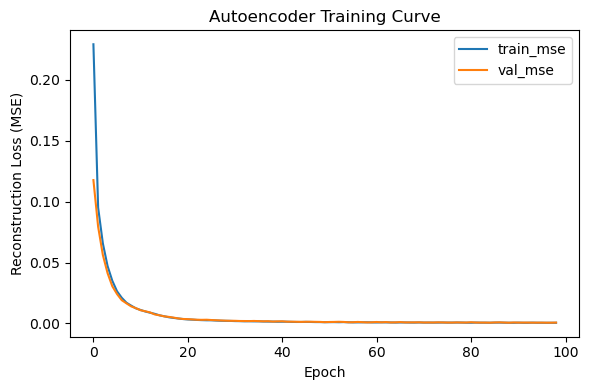

In [94]:
plt.figure(figsize=(6,4))
plt.plot(history_ae.history["loss"], label="train_mse")
plt.plot(history_ae.history["val_loss"], label="val_mse")
plt.xlabel("Epoch")
plt.ylabel("Reconstruction Loss (MSE)")
plt.title("Autoencoder Training Curve")
plt.legend()
plt.tight_layout()
plt.show()

Extracting latent embeddings

In [95]:
Z_train = encoder.predict(X_train_nn)
Z_test  = encoder.predict(X_test_nn)

Z_train.shape, Z_test.shape

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step


((5634, 16), (1409, 16))

Training one shallow model on latent features

In [96]:
lr_ae = LogisticRegression(
    max_iter=2000,
    class_weight="balanced",
    random_state=42
)

lr_ae.fit(Z_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=2000, random_state=42)

In [97]:
y_pred_ae = lr_ae.predict(Z_test)

acc_ae = accuracy_score(y_test, y_pred_ae)
f1_ae = f1_score(y_test, y_pred_ae)
cm_ae = confusion_matrix(y_test, y_pred_ae)

acc_ae, f1_ae, cm_ae

(0.7366926898509581,
 0.6098843322818086,
 array([[748, 287],
        [ 84, 290]]))

In [98]:
comparison_df = pd.DataFrame([
    {"Model": "Logistic Regression (raw)",     "Accuracy": 0.74, "F1": 0.62, "Category": "Shallow"},
    {"Model": "Random Forest (tuned)",         "Accuracy": 0.77, "F1": 0.63, "Category": "Shallow"},
    {"Model": "Gradient Boosting (tuned)",     "Accuracy": 0.80, "F1": 0.58, "Category": "Shallow"},
    {"Model": "Ensemble (soft voting)",        "Accuracy": 0.77, "F1": 0.62, "Category": "Shallow"},
    {"Model": "FFNN (best config)",            "Accuracy": 0.73, "F1": 0.61, "Category": "Neural Network"},
    {"Model": "Autoencoder + Logistic Reg.",   "Accuracy": 0.74, "F1": 0.61, "Category": "AE-based"},
])

comparison_df.sort_values(by="F1", ascending=False)


,Model,Accuracy,F1,Category
1,Random Forest (tuned),0.77,0.63,Shallow
0,Logistic Regression (raw),0.74,0.62,Shallow
3,Ensemble (soft voting),0.77,0.62,Shallow
4,FFNN (best config),0.73,0.61,Neural Network
5,Autoencoder + Logistic Reg.,0.74,0.61,AE-based
2,Gradient Boosting (tuned),0.80,0.58,Shallow


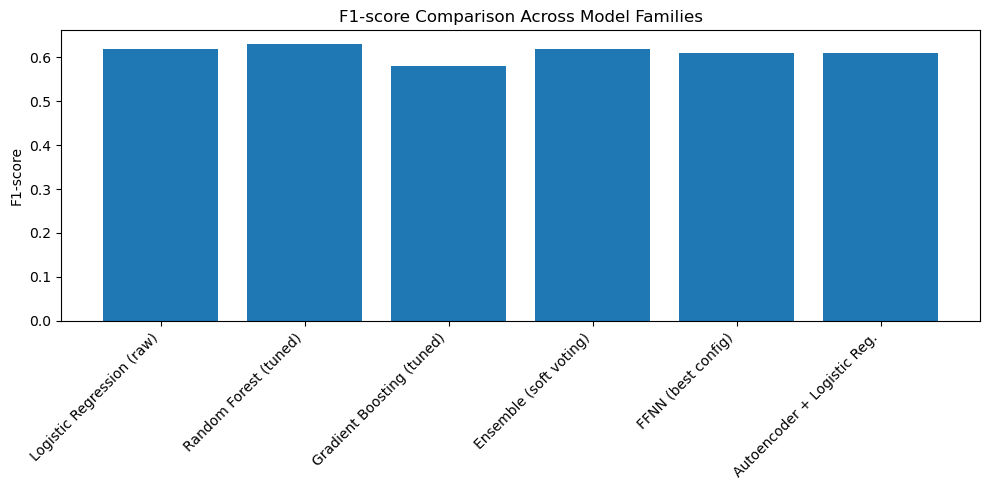

In [99]:
plt.figure(figsize=(10,5))
plt.bar(comparison_df["Model"], comparison_df["F1"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("F1-score")
plt.title("F1-score Comparison Across Model Families")
plt.tight_layout()
plt.show()

Random Forest achieves the highest F1-score → best churn detector

Gradient Boosting maximizes accuracy but sacrifices recall → unsuitable for churn

Ensemble improves stability but not peak performance

FFNN performs competitively but does not outperform tree models

Autoencoder features retain most predictive information but do not improve performance over raw features

Prediction from final model

In [100]:
y_pred_rf = best_rf.predict(X_test)

error_df = X_test.copy()
error_df["true_churn"] = y_test.values
error_df["pred_churn"] = y_pred_rf

Identify misclassification types

In [101]:
fn_df = error_df[
    (error_df["true_churn"] == 1) & (error_df["pred_churn"] == 0)
]

fp_df = error_df[
    (error_df["true_churn"] == 0) & (error_df["pred_churn"] == 1)
]

fn_df.shape, fp_df.shape

((92, 21), (237, 21))

Comparing FN vs correctly predicted churners

In [102]:
tp_df = error_df[
    (error_df["true_churn"] == 1) & (error_df["pred_churn"] == 1)
]

In [103]:
summary = pd.DataFrame({
    "FN_mean": fn_df[["tenure", "MonthlyCharges"]].mean(),
    "TP_mean": tp_df[["tenure", "MonthlyCharges"]].mean()
})

summary

,FN_mean,TP_mean
tenure,32.065217,11.372340
MonthlyCharges,66.671196,74.755851


Categorical pattern analysis

In [104]:
fn_contract = fn_df["Contract"].value_counts(normalize=True)
tp_contract = tp_df["Contract"].value_counts(normalize=True)

pd.concat(
    [fn_contract, tp_contract],
    axis=1,
    keys=["False Negatives", "True Positives"]
)

,False Negatives,True Positives
Contract,,
Month-to-month,0.554348,0.985816
One year,0.347826,0.014184
Two year,0.097826,NaN


Interpret False Positives

In [105]:
fp_df[["tenure", "MonthlyCharges"]].describe()

,tenure,MonthlyCharges
count,237.000000,237.000000
mean,17.708861,74.588397
std,17.062312,23.171966
min,1.000000,19.400000
25%,3.000000,55.800000
50%,11.000000,79.300000
75%,26.000000,91.450000
max,67.000000,111.400000


Compare agains true negatives

In [106]:
tn_df = error_df[
    (error_df["true_churn"] == 0) & (error_df["pred_churn"] == 0)
]

pd.DataFrame({
    "FP_mean": fp_df[["tenure", "MonthlyCharges"]].mean(),
    "TN_mean": tn_df[["tenure", "MonthlyCharges"]].mean()
})

,FP_mean,TN_mean
tenure,17.708861,43.377193
MonthlyCharges,74.588397,56.903321


Compare errors across models

In [107]:
models = {
    "Logistic Regression": best_lr,
    "Random Forest": best_rf
}

for name, model in models.items():
    y_p = model.predict(X_test)
    cm = confusion_matrix(y_test, y_p)
    fn = cm[1,0]
    print(f"{name} FN: {fn}")


Logistic Regression FN: 80
Random Forest FN: 92


While Logistic Regression identified slightly more churners, it produced a significantly higher number of false positives. Random Forest achieved a better balance between precision and recall, resulting in a higher F1-score despite a modest increase in false negatives.

SHAP

In [108]:
import shap

X_test_proc = best_rf.named_steps["preprocessor"].transform(X_test)

if hasattr(X_test_proc, 'toarray'):
    X_test_proc = X_test_proc.toarray()

feature_names = best_rf.named_steps["preprocessor"].get_feature_names_out()

SHAP explainer

In [109]:
explainer_rf = shap.TreeExplainer(
    best_rf.named_steps["model"]
)

shap_values_rf = explainer_rf.shap_values(X_test_proc)

Global feature importance

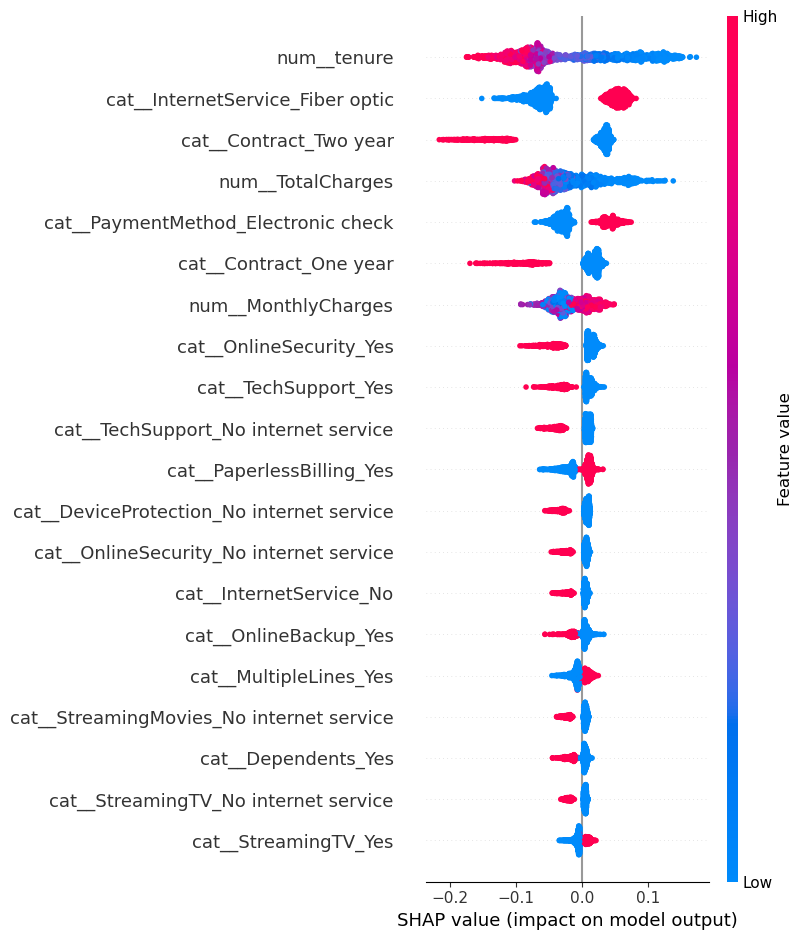

In [110]:
shap.summary_plot(
    shap_values_rf[:, :, 1],
    X_test_proc,
    feature_names=feature_names
)

Differences between models

In [111]:
shap_rf_pos = shap_values_rf[:, :, 1]
imp_rf = np.mean(np.abs(shap_rf_pos), axis=0)

explainer_gb = shap.TreeExplainer(best_gb.named_steps["model"])
shap_values_gb = explainer_gb.shap_values(X_test_proc)
shap_churn_gb = shap_values_gb

imp_gb = np.mean(np.abs(shap_churn_gb), axis=0)

shap_compare = pd.DataFrame({
    "feature": feature_names,
    "RF_mean_abs_shap": imp_rf,
    "GB_mean_abs_shap": imp_gb,
})

shap_compare["RF_minus_GB"] = shap_compare["RF_mean_abs_shap"] - shap_compare["GB_mean_abs_shap"]
shap_compare["abs_diff"] = shap_compare["RF_minus_GB"].abs()

In [112]:
top_diff = shap_compare.sort_values("abs_diff", ascending=False).head(15)
top_diff[["feature", "RF_mean_abs_shap", "GB_mean_abs_shap", "RF_minus_GB"]]

,feature,RF_mean_abs_shap,GB_mean_abs_shap,RF_minus_GB
0,num__tenure,0.075825,0.477123,-0.401298
25,cat__Contract_Two year,0.059766,0.426883,-0.367117
10,cat__InternetService_Fiber optic,0.061981,0.396465,-0.334484
2,num__TotalCharges,0.041163,0.241970,-0.200806
28,cat__PaymentMethod_Electronic check,0.035038,0.227094,-0.192056
24,cat__Contract_One year,0.033246,0.189333,-0.156088
26,cat__PaperlessBilling_Yes,0.015709,0.147957,-0.132248
1,num__MonthlyCharges,0.026318,0.128990,-0.102673
19,cat__TechSupport_Yes,0.017602,0.106478,-0.088875
9,cat__MultipleLines_Yes,0.009170,0.093323,-0.084153


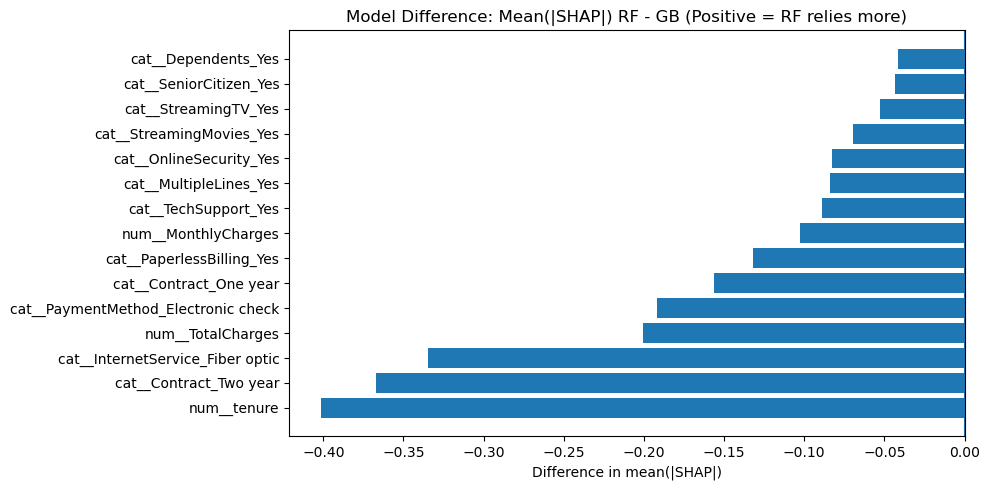

In [113]:
top_diff_plot = top_diff.sort_values("RF_minus_GB")

plt.figure(figsize=(10,5))
plt.barh(top_diff_plot["feature"], top_diff_plot["RF_minus_GB"])
plt.axvline(0)
plt.title("Model Difference: Mean(|SHAP|) RF - GB (Positive = RF relies more)")
plt.xlabel("Difference in mean(|SHAP|)")
plt.tight_layout()
plt.show()

Best Model for deploy

Based on evaluation across shallow models, neural networks, and autoencoder-based approaches, Random Forest is the most suitable model for deployment.

Why Random Forest:

1. It achieved the highest F1-score, which is the most appropriate metric for imbalanced churn prediction.
2. It provided a balanced trade-off between false positives and false negatives.
3. It outperformed Logistic Regression, FFNN, and AE-based models on structured tabular data.
4. It supports strong interpretability through SHAP, which is critical for business trust and actionability.

Although Logistic Regression missed slightly fewer churners, it produced substantially more false positives. Random Forest offered a more cost-efficient and stable decision boundary, making it preferable in a real retention strategy.

Features Contribution

SHAP analysis revealed consistent and interpretable drivers of churn across tree-based models:

Most influential features:

1. Tenure:
Customers with shorter tenure have a significantly higher likelihood of churn.

2. Contract type:
Month-to-month contracts strongly increase churn risk, while long-term contracts are protective.

3. Monthly Charges:
Higher monthly costs push predictions toward churn, especially for short-tenure users.

4. Service-related features:
Lack of online security, technical support, and add-on services increases churn probability.

5. Payment method:
Electronic check usage is associated with higher churn risk.

SHAP also showed that Random Forest distributed importance more evenly across service and contract features, whereas Gradient Boosting relied more heavily on pricing-related signals—explaining its conservative churn predictions and higher false-negative rate.

Improvement


Several realistic and business-relevant improvements could enhance churn prediction performance:

1. Threshold optimization:
Adjusting the classification threshold to favor recall could reduce missed churners when retention cost is low.

2. Cost-sensitive learning:
Explicitly weighting false negatives higher could better align predictions with business priorities.

3. Temporal features:
Incorporating usage trends, billing changes, or recent support interactions could capture early churn signals.

4. Customer segmentation:
Training specialized models for short-tenure vs long-tenure customers may improve recall for subtle churn cases.

5. Behavioral data integration:
Adding engagement metrics (e.g., service usage frequency) would likely outperform purely static features.